In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [4]:
#loads data
df = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates = True)
df = df.dropna()
for col in ['rest1', 'rest2', 'rest3', 'rest4', 'total']:
    df[col] = df[col].astype(int)

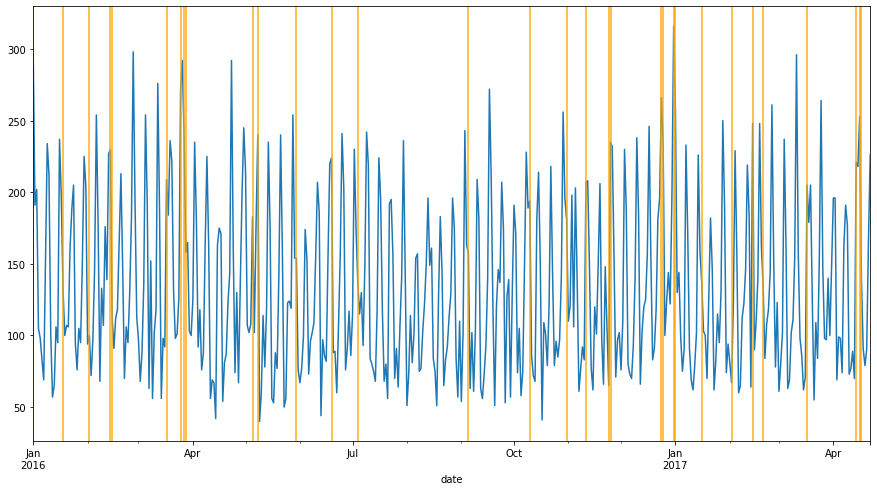

In [5]:
#visualize the data
ax = df['total'].plot(figsize=(15,8))

for day in df[df['holiday']==1].index:
    ax.axvline(x=day, color='orange', alpha = 0.9)

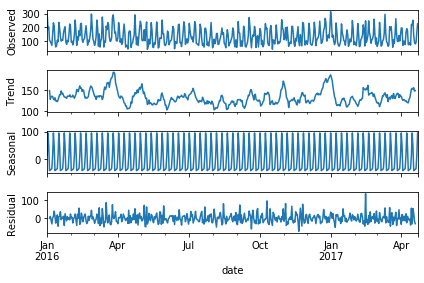

In [6]:
seasonal_decompose(df['total']).plot();

In [7]:
from pmdarima import auto_arima

In [40]:
#find arima model
results = auto_arima(df['total'], seasonal=True, m=7, trace = True)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4936.412, BIC=4969.769, Fit time=3.863 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5269.484, BIC=5277.823, Fit time=0.024 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4916.749, BIC=4933.428, Fit time=1.296 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=5049.644, BIC=5066.322, Fit time=0.679 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=6126.084, BIC=6130.254, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5200.790, BIC=5213.298, Fit time=0.184 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4845.442, BIC=4866.290, Fit time=3.082 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=4804.838, BIC=4825.686, Fit time=1.022 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:                       y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1, 7)   Log Likelihood               -2387.926
Date:                 Sun, 29 Dec 2019   AIC                           4783.852
Time:                         00:29:08   BIC                           4800.531
Sample:                              0   HQIC                          4790.409
                                 - 478                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0699      2.102      2.887      0.004       1.949      10.191
ar.S.L7        0.9534      0.016     60.039      0.000       0.922       0.985
ma.S.L7       -0.7315      0.056    -13.101      0.000      -0.841      -0.622
sigma2      1357.6408     88.981     15.258      0.000    1183.242    1532.040
===================================================================================
Ljung-Box (Q):                       73.59   Jarque-Bera (JB):                58.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
#train test split
train = df.iloc[:436]
test = df.iloc[436:]

#indces for the train test split
start = len(train)
end = start + len(test)-1

In [9]:
#create and train a model without considering the exogenous variables
model = SARIMAX(df['total'], order=(0,0,0), seasonal_order=(1,0,1,7), enforce_invertibility=False).fit()

In [10]:
#get predictions
pred = model.predict(start, end)

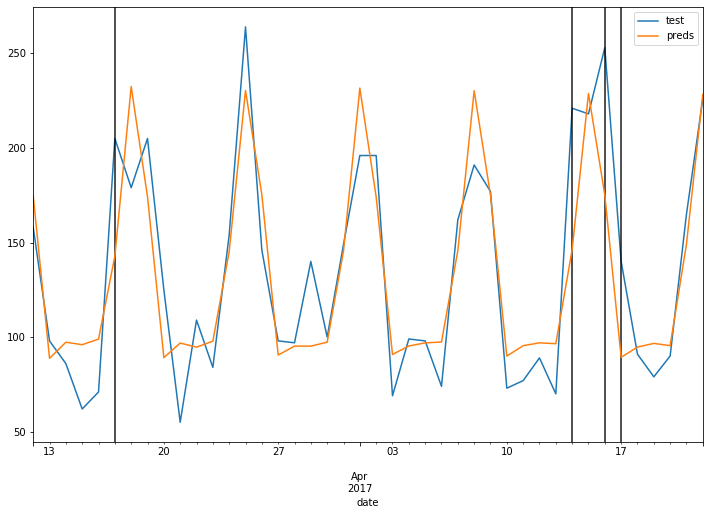

In [11]:
#compare predictions
ax = test['total'].plot(label = 'test', legend = True, figsize = (12,8))

for day in test[test['holiday'] == 1].index:
    ax.axvline(x=day, color = 'k', alpha=.9)

pred.plot(label = 'preds', legend = True);
#train['total'].plot(label='train')

In [12]:
from statsmodels.tools.eval_measures import rmse

In [13]:
#get rmse
rmse(test['total'], pred)

30.328655110412985

In [14]:
ex = pd.DataFrame(df['holiday'])

In [98]:
#get arima model considering exogenous variable
auto_arima(df['total'], exogenous=ex, trace=True, seasonal=True, m=7).summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4839.184, BIC=4876.710, Fit time=4.389 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5235.582, BIC=5248.091, Fit time=0.072 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4797.240, BIC=4818.088, Fit time=1.424 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=4969.638, BIC=4990.486, Fit time=0.902 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=6068.575, BIC=6076.914, Fit time=0.102 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5171.193, BIC=5187.871, Fit time=0.462 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4756.026, BIC=4781.044, Fit time=3.037 seconds
Near non-invertible roots for order (1, 0, 0)(2, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 7); AIC=4716.148, BIC=4741.166, Fit time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2352.074
Date:                           Sun, 29 Dec 2019   AIC                           4716.148
Time:                                   01:36:40   BIC                           4741.166
Sample:                               01-01-2016   HQIC                          4725.984
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.0543      2.850      5.634      0.000      10.469      21.639
holiday       45.9411      4.303     10.676      0.000      37.507      54.375
ar.L1          0.0462      0.046      1.004      0.316      -0.044       0.136
ar.S.L7        0.8725      0.022     40.019      0.000       0.830       0.915
ma.S.L7       -0.4876      0.059     -8.335      0.000      -0.602      -0.373
sigma2      1037.9156     70.910     14.637      0.000     898.934    1176.897
===================================================================================
Ljung-Box (Q):                      115.75   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.89   Skew:                             0.31
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#make model with exogenous variables
model = SARIMAX(train['total'], exog=train['holiday'], order = (1,0,0), seasonal_order=(1,0,1,7)).fit()

In [16]:
#get predictions
preds = model.predict(start, end, exog=pd.DataFrame(test['holiday']))

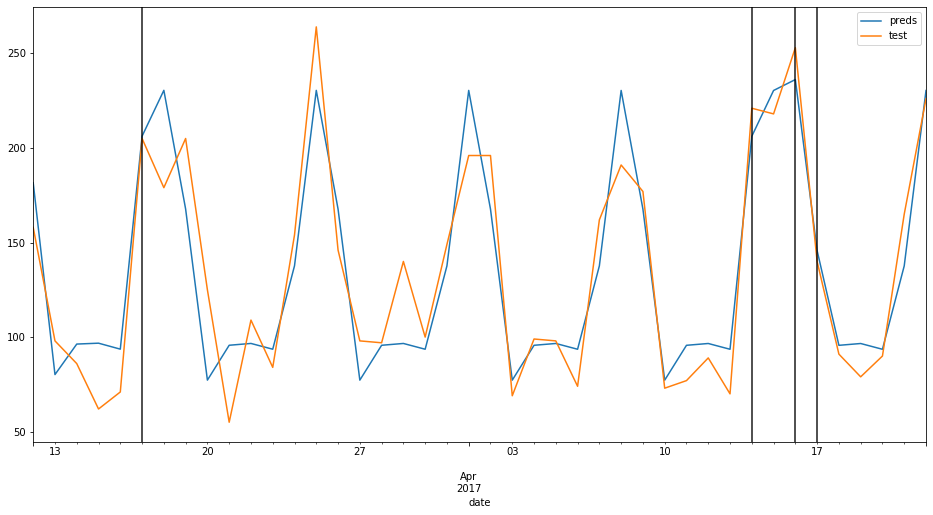

In [17]:
#plot predictions
preds.plot(label= 'preds', legend = True, figsize=(16,8))
ax = test['total'].plot(label= 'test', legend = True)
for day in test[test['holiday'] == 1].index:
    ax.axvline(x=day, color = 'k', alpha=.9);

In [18]:
#notice the difference in the rmse
rmse(preds, test['total'])

23.264665804145096